In [12]:
from data_utils import DataLoader
from spectral_mix import SpectralMix
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dl = DataLoader()

dataset = dl.load_dataset('acm')
d = 9

num_nodes, _, num_rels = dataset['adjacency_matrix'].shape
_, num_attr = dataset['attribute_matrix'].shape

# runtime test for increasing n
runtime_result = pd.DataFrame(columns=['n', 'runtime', 'method']) 
for n in range(500, num_nodes, 500):
    # take subset of adjacency matrix and attribute matrix
    adjacency_matrix = dataset['adjacency_matrix'][:n, :n, :]
    attribute_matrix = dataset['attribute_matrix'][:n, :]

    sm = SpectralMix(adjacency_matrix=adjacency_matrix, attribute_matrix=attribute_matrix, d=d)
    begin = time.time()
    sm.fit(run_clustering=False)
    runtime = time.time() - begin

    result = []
    result.append(n)
    result.append(runtime)
    result.append('var_n')
    runtime_result.loc[len(runtime_result)] = result

    runtime_result.to_csv('test_results/runtime_acm.csv')

# runtime test for increasing n
for a in range(100, num_attr, 100):
    # take subset of adjacency matrix and attribute matrix
    adjacency_matrix = dataset['adjacency_matrix']
    attribute_matrix = dataset['attribute_matrix'][:, :a]

    sm = SpectralMix(adjacency_matrix=adjacency_matrix, attribute_matrix=attribute_matrix, d=d)
    begin = time.time()
    sm.fit(run_clustering=False)
    runtime = time.time() - begin

    result = []
    result.append(a)
    result.append(runtime)
    result.append('var_a')
    runtime_result.loc[len(runtime_result)] = result

    runtime_result.to_csv('test_results/runtime.csv')

100%|██████████| 50/50 [01:46<00:00,  2.13s/it]


In [57]:
dataset = dl.load_dataset('acm')
d = 9

num_nodes, _, num_rels = dataset['adjacency_matrix'].shape
_, num_attr = dataset['attribute_matrix'].shape

# runtime test for increasing r
for r in range(1, 10):
    # take subset of adjacency matrix and attribute matrix
    adjacency_matrix = dataset['adjacency_matrix']
    attribute_matrix = dataset['attribute_matrix']
    stack_list = []
    for i in range(r):
        stack_list.append(adjacency_matrix[:, :, 1])
    adjacency_matrix = np.stack(stack_list, axis=-1)

    sm = SpectralMix(adjacency_matrix=adjacency_matrix, attribute_matrix=None, d=d)
    begin = time.time()
    sm.fit(run_clustering=False)
    runtime = time.time() - begin

    result = []
    result.append(r)
    result.append(runtime)
    result.append('var_r')
    runtime_result.loc[len(runtime_result)] = result

    runtime_result.to_csv('test_results/runtime.csv')

100%|██████████| 50/50 [04:14<00:00,  5.10s/it]


In [59]:
def plot_runtime(data, title, x_title):
    _, ax = plt.subplots()
    ax.plot(data['n'], data['runtime'], color='mediumseagreen')
    
    ax.set_xlim(np.min(data['n']), np.max(data['n']))
    ax.set_title(title)
    ax.set_xlabel(x_title)
    ax.set_ylabel('Runtime [s]')
    ax.grid(which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.savefig(f'plots/runtime_{x_title.replace(' ', '_')}.png')
    plt.show()

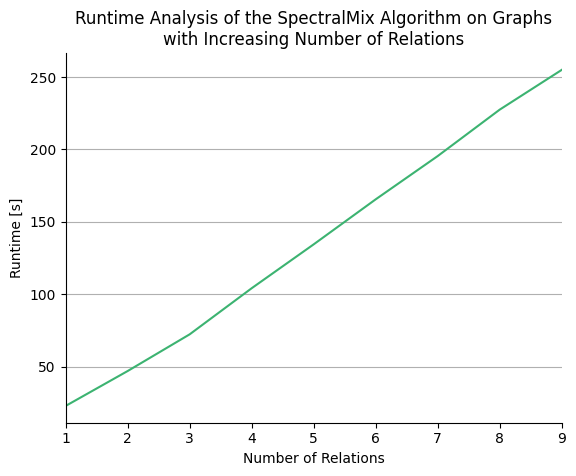

In [60]:
runtime_result = pd.read_csv('test_results/runtime.csv', index_col=0)

var_r_runtime = runtime_result[runtime_result['method'] == 'var_r']
plot_runtime(
    var_r_runtime, 
    'Runtime Analysis of the SpectralMix Algorithm on Graphs\nwith Increasing Number of Relations', 
    'Number of Relations'
)

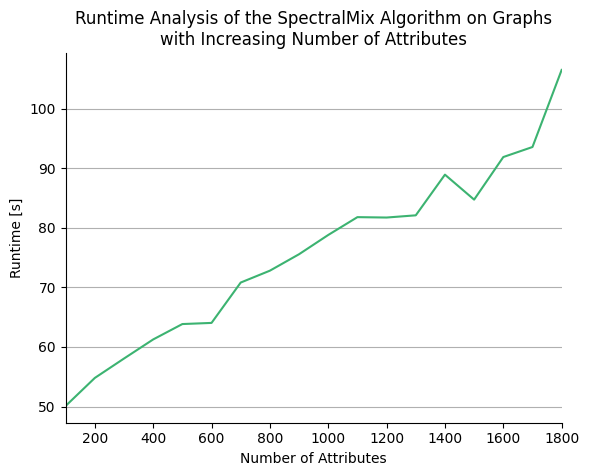

In [61]:
var_a_runtime = runtime_result[runtime_result['method'] == 'var_a']

plot_runtime(
    var_a_runtime, 
    'Runtime Analysis of the SpectralMix Algorithm on Graphs\nwith Increasing Number of Attributes', 
    'Number of Attributes', 
)

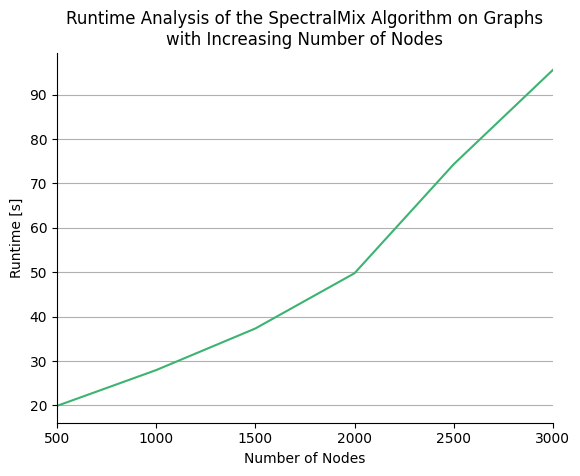

In [56]:
var_n_runtime = runtime_result[runtime_result['method'] == 'var_n']

plot_runtime(
    var_n_runtime, 
    'Runtime Analysis of the SpectralMix Algorithm on Graphs\nwith Increasing Number of Nodes', 
    'Number of Nodes'
)